In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [73]:
df =pd.read_csv('Social_Network_Ads.csv')

In [74]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [75]:
df =df.iloc[:,2:]

train test spilt

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df.drop('Purchased', axis=1), df['Purchased'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

StandardScaler

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [79]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [80]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [81]:
X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [82]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [83]:
np.mean(X_train_scaled.describe(),1)

count    2.800000e+02
mean     4.916702e-17
std      1.001791e+00
min     -1.766231e+00
25%     -7.731251e-01
50%     -3.234882e-02
75%      6.618720e-01
max      2.244641e+00
dtype: float64

EFFECT OF SCALING

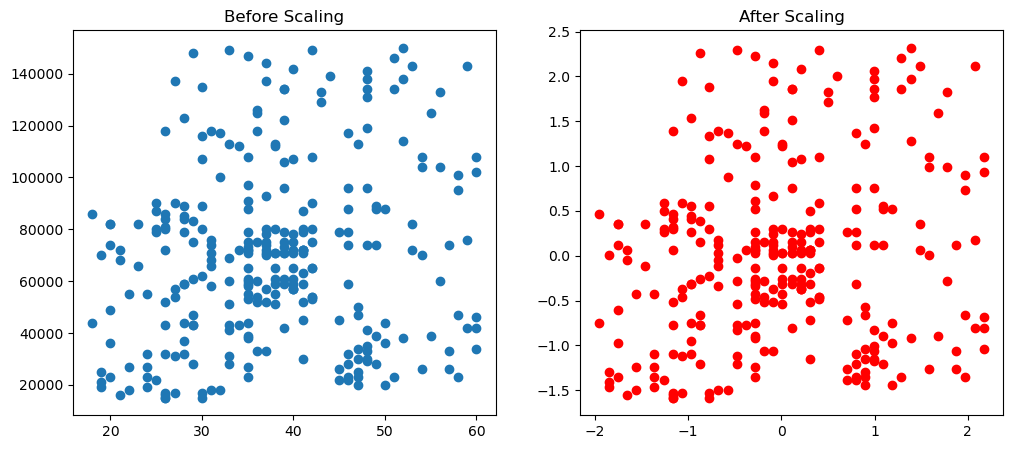

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

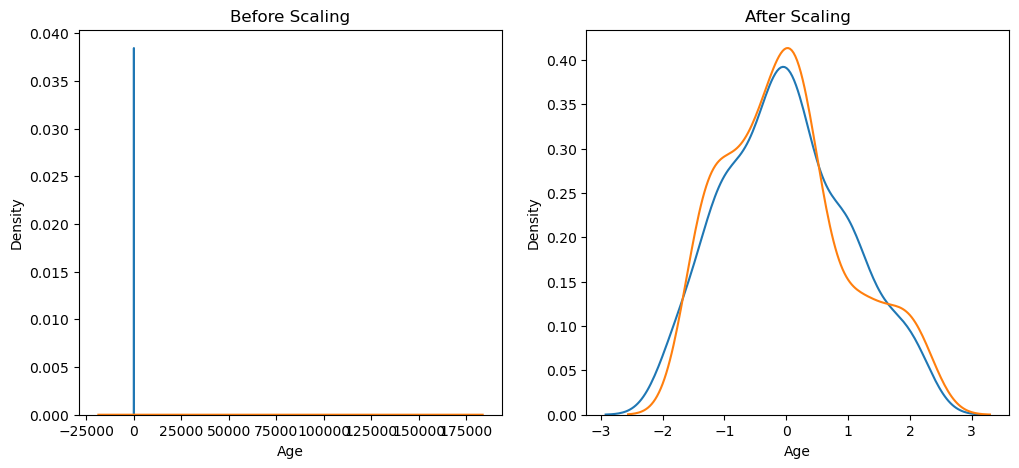

In [85]:
fig ,( ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

comparision of distribution 

<Axes: title={'center': 'age distribution after scaling'}, xlabel='Age', ylabel='Density'>

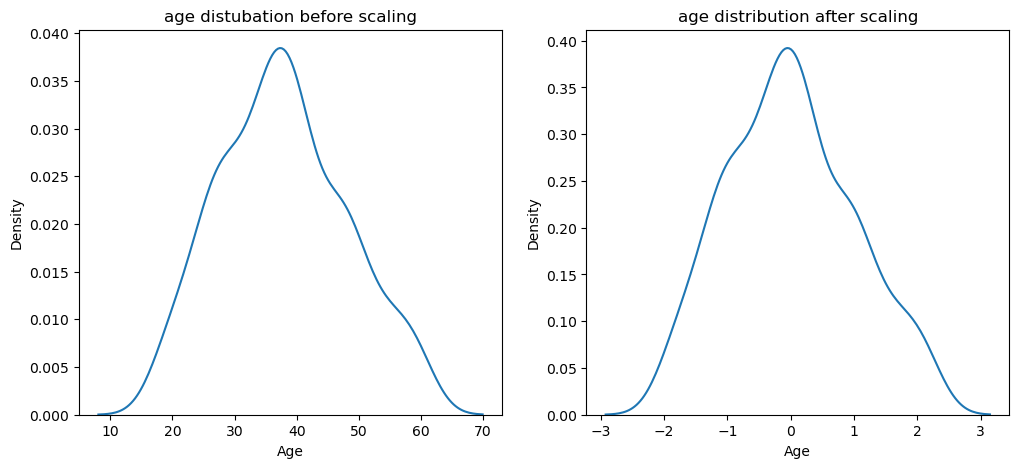

In [86]:
fig ,( ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('age distubation before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

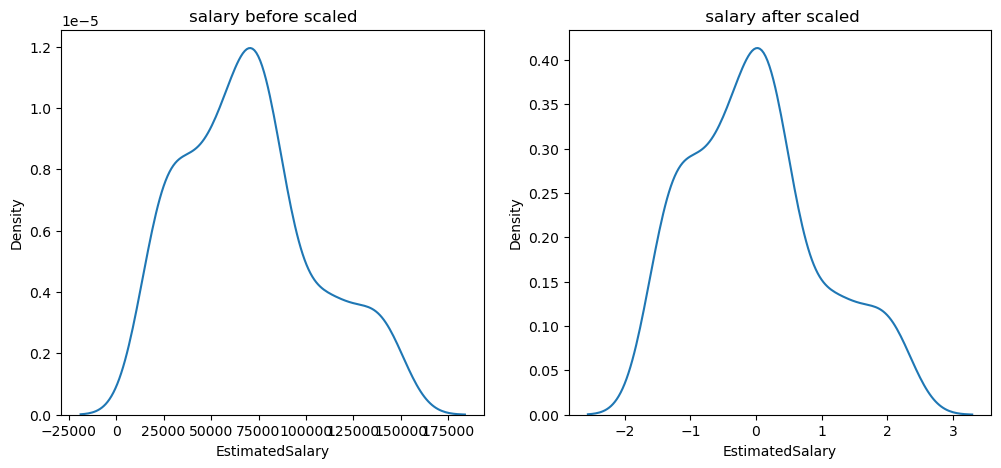

In [87]:
fig ,( ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('salary before scaled')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title(' salary after scaled')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

why is scaling is important 

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [90]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)  

LogisticRegression()

In [91]:
y_pred =lr.predict(X_test)
y_pred_scaled =lr_scaled.predict(X_test_scaled)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
scaled 0.8666666666666667


In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt =DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [96]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [97]:

y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [98]:
print("ACTUAL",accuracy_score(y_test,y_pred))
print("SCALED",accuracy_score(y_test,y_pred_scaled))

ACTUAL 0.875
SCALED 0.875


In [99]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


effect of outliner

In [100]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)
#dataframe is invalid concat will work 

In [101]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


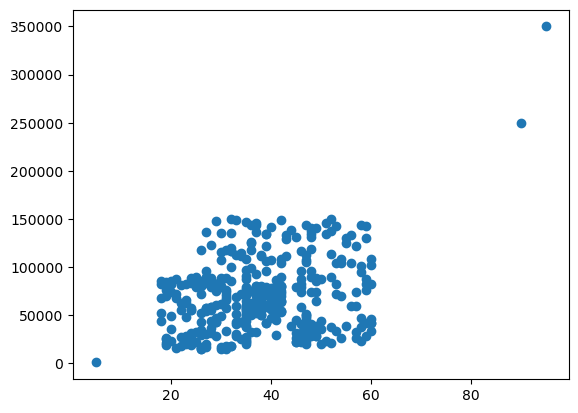

In [102]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

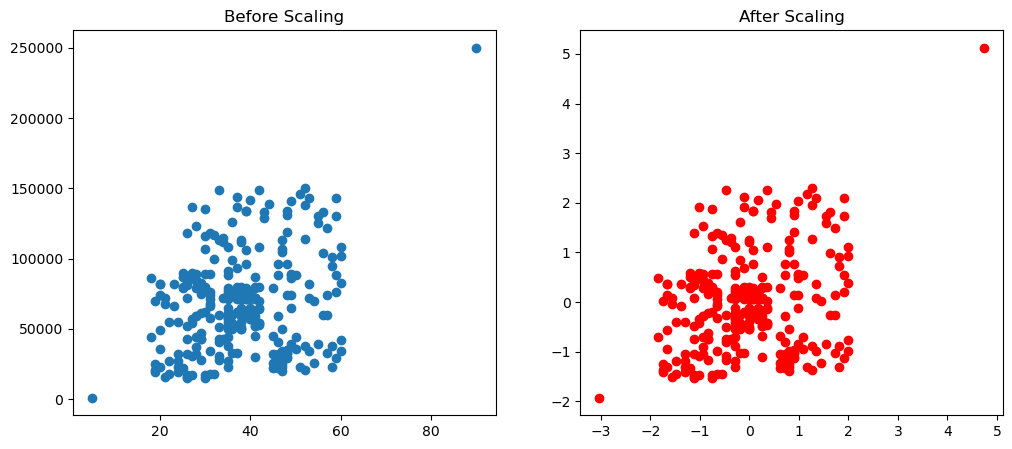

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()